# Network log

In [1]:
%matplotlib inline
import pylab
import numpy as np
import datetime
from matplotlib.dates import date2num
from pysurvey.plot import setup, dateticks, hcolorbar, line, legend, box

In [2]:
interfacelist = ['en0', 'en4']
with open('/Users/ajmendez/data/.netlog.dat','r') as f:
    idata = []
    out = {}
    for l in f.readlines():
        try:
            if '|' in l:
                date = date2num(datetime.datetime.fromtimestamp(int(l.split(' | ')[0])))
            else:
                date = date2num(datetime.datetime.fromtimestamp(int(l)))
            print '.',
#             print 'Found Date: {}'.format(date)
            if len(out) > 0:
                idata.append(out)
                
            out = dict(date=date)
        except Exception as e:
            tmp = l.split()
            interface = tmp[0]
            if (interface not in out) and (interface in interfacelist):
                out[interface] = np.array([int(tmp[6]), int(tmp[9])])/1e9 #GB
    idata.append(out)
print '\nFound {} items'.format(len(idata))

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [3]:
data = np.zeros((len(idata), len(interfacelist)+1, 2))
for i,day in enumerate(idata):
    data[i,0,0] = day['date']
    for j, interface in enumerate(interfacelist,1):
        try:
            data[i,j,:] = day[interface]
        except:
            pass
    

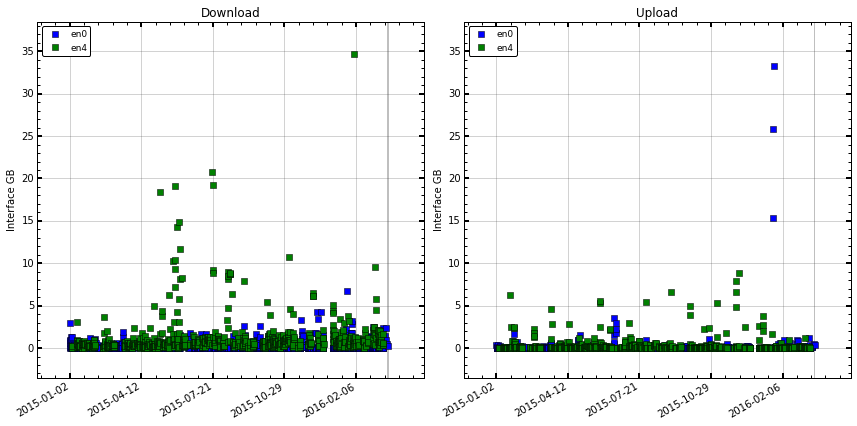

In [4]:
setup(figsize=(12,6))

now = datetime.datetime.now()
delta = datetime.timedelta(hours=48)
ii_interface = np.array([interfacelist.index(x)+1 for x in interfacelist])
x = data[:,0,0][1:]# + np.diff(data[:,0,0])/2.0
colors = ['b','g']
for i,name in enumerate(['Download', 'Upload']):
    setup(subplt=121+i, ylabel='Interface GB', title=name)
    for k, iname in zip(ii_interface, interfacelist):
        y = np.diff(data[:,k,i])
        ii = np.where(y > 0)
        pylab.plot(x[ii], y[ii], 's', label=iname)
    legend(loc=2)
    setup(embiggenx=0.1, embiggeny=0.1)
    dateticks('%Y-%m-%d')
    
    box(x=date2num([now-delta,now]), zorder=-2, color='gray', alpha=0.5, lw=0)
pylab.tight_layout()

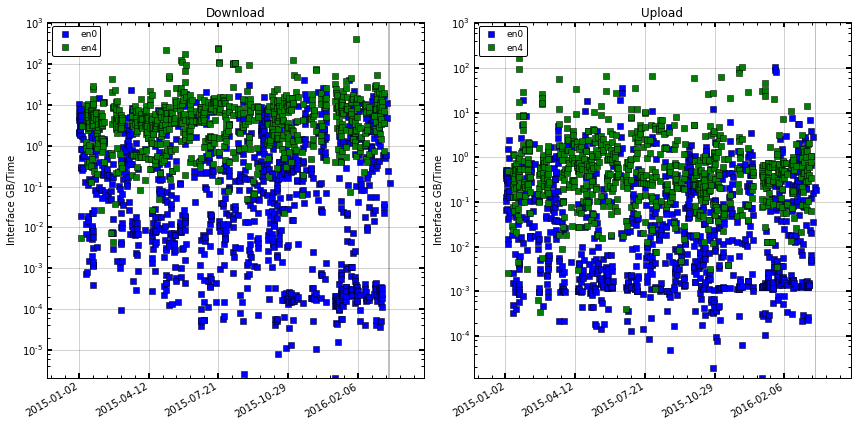

In [5]:
setup(figsize=(12,6))

now = datetime.datetime.now()
delta = datetime.timedelta(hours=48)
ii_interface = np.array([interfacelist.index(x)+1 for x in interfacelist])
x = data[:,0,0][1:]# + np.diff(data[:,0,0])/2.0
colors = ['b','g']
for i,name in enumerate(['Download', 'Upload']):
    setup(subplt=121+i, ylabel='Interface GB/Time', title=name, ylog=True)
    for k, iname in zip(ii_interface, interfacelist):
        y = np.diff(data[:,k,i])/np.diff(data[:,0,0])
        ii = np.where(y > 0)
        pylab.plot(x[ii], y[ii], 's', label=iname)
    legend(loc=2)
    setup(embiggenx=0.1, embiggeny=0.1)
    dateticks('%Y-%m-%d')
    
    box(x=date2num([now-delta,now]), zorder=-2, color='gray', alpha=0.5, lw=0)
pylab.tight_layout()